# 単回帰分析
https://qiita.com/namoshika/items/63db972bfd1030f8264a

傾きaの計算式

$$
    a =\frac {\sum_{n=1}^{N}x_ny_n} {\sum_{n=1}^{N}x_n^2}  \quad
$$

|x|y|
|:-|:-|
|1|2|
|2|3.9|
|3|6.1|


# Numpy：数値計算用のライブラリ

In [3]:
import numpy as np

In [9]:
# ベクトルの定義を行う
x = np.array([1,2,3])
y = np.array([2,3.9,6.1])
x,y

(array([1, 2, 3]), array([2. , 3.9, 6.1]))

In [25]:
## データの中心化
### 平均を算出する必要がある。
x.mean()

2.0

In [26]:
y.mean()

4.0

In [27]:
# 中心化
xc = x - x.mean() # numpyは１つだけの足し算、引き算をしても全てに適用してくれる

In [28]:
xc

array([-1.,  0.,  1.])

In [29]:
yc = y - y.mean()

In [30]:
yc

array([-2. , -0.1,  2.1])

## パラメータaの計算
https://analytics-note.xyz/programming/numpy-printoptions/

In [83]:
print(np.get_printoptions())

{'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 3, 'suppress': True, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': False}


In [84]:
np.set_printoptions(precision=3, suppress=True)

In [85]:
ary = np.random.randn(5,3)

In [86]:
print(ary)

[[ 0.381  0.326  2.851]
 [-0.496  1.081  0.343]
 [-0.492 -1.438 -1.494]
 [ 0.228 -0.317  0.294]
 [ 0.049 -2.489 -2.078]]


In [60]:
# 要素ごとの掛け算(要素積)
x*x

array([1, 4, 9])

In [61]:
x

array([1, 2, 3])

In [62]:
xx = xc*xc

In [63]:
xx

array([1., 0., 1.])

In [64]:
xy=xc * yc # 要素積の計算

In [65]:
xx.sum()

2.0

In [66]:
xy.sum()

4.1

In [67]:
a = xy.sum() / xx.sum()

In [87]:
a

2.05

# Pandas

In [3]:
import pandas as pd

In [90]:
# CSVファイルの読み込み
# df: data frame
df = pd.read_csv('sample.csv')

In [97]:
df.head(10)

x         y
0  40.362  137500.0
1  40.686  132500.0
2  38.430   93000.0
3  36.822   96500.0
4  37.002  100500.0
5  35.106   97500.0
6  35.016   97500.0
7  36.762  102000.0
8  38.844   99000.0
9  37.374   97000.0

In [98]:
# データの抽出

In [100]:
x = df['x']
y = df['y']

In [101]:
x

0     40.362
1     40.686
2     38.430
3     36.822
4     37.002
       ...  
95    47.250
96    43.722
97    42.642
98    43.644
99    41.850
Name: x, Length: 100, dtype: float64

In [102]:
y

0     137500.0
1     132500.0
2      93000.0
3      96500.0
4     100500.0
        ...   
95    250000.0
96    166500.0
97    151500.0
98    173000.0
99    174500.0
Name: y, Length: 100, dtype: float64

### Matplotlib：グラフの描画
- Numpy：計算
- Pandas：DBの操作
- Matplotlib:描画

In [103]:
import matplotlib.pyplot as plt

In [105]:
%matplotlib inline

In [109]:
# 散布図をプロット
# 横軸をx、縦軸をyの散布図(scatter)をプロット
plt.scatter(x,y)
plt.show()

# 単回帰分析の実装

## データの中心化

In [113]:
#データフレームの中に、データの概要を表示するものもある。
df.describe()
# 平均が0になるように、データの中心化を行う。

x              y
count  100.000000     100.000000
mean    37.622220  121065.000000
std      4.087547   47174.009226
min     29.418000   59000.000000
25%     35.151000   90375.000000
50%     36.909000  104250.000000
75%     39.439500  147250.000000
max     50.250000  250000.000000

In [115]:
x.mean() # よりも楽なのが、データフレームごと平均をとってあげることができる。

37.62222

In [118]:
df.mean() # データフレームごと、引き算することができる

x        37.62222
y    121065.00000
dtype: float64

In [125]:
df_c = df - df.mean()

In [218]:
df_c

x         y
0   2.73978   16435.0
1   3.06378   11435.0
2   0.80778  -28065.0
3  -0.80022  -24565.0
4  -0.62022  -20565.0
..      ...       ...
95  9.62778  128935.0
96  6.09978   45435.0
97  5.01978   30435.0
98  6.02178   51935.0
99  4.22778   53435.0

[100 rows x 2 columns]

In [127]:
df_c.describe()

x              y
count  1.000000e+02     100.000000
mean   1.918465e-15       0.000000
std    4.087547e+00   47174.009226
min   -8.204220e+00  -62065.000000
25%   -2.471220e+00  -30690.000000
50%   -7.132200e-01  -16815.000000
75%    1.817280e+00   26185.000000
max    1.262778e+01  128935.000000

In [219]:
# データの抽出
x = df_c['x']
y = df_c['y']

In [220]:
x

0     2.73978
1     3.06378
2     0.80778
3    -0.80022
4    -0.62022
       ...   
95    9.62778
96    6.09978
97    5.01978
98    6.02178
99    4.22778
Name: x, Length: 100, dtype: float64

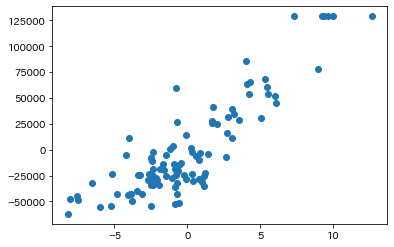

In [202]:
# x,y の散布図を表示
# 0を中心として、表示　(平均が0となるように表示)
plt.scatter(x,y)
plt.show()

# パラメータaの計算
- 予測値を求めるには、どんな線を引けばいいのか？？

$$
a = \dfrac{\displaystyle{\sum_{n=1}^{N}}x_{n}y_{n}}
{\displaystyle{\sum_{n=1}^{N}}x_{n}^{2}}
$$

In [203]:
xx = x * x # * は要素積
xy = x * y

In [204]:
xx

0      7.506394
1      9.386748
2      0.652509
3      0.640352
4      0.384673
        ...    
95    92.694148
96    37.207316
97    25.198191
98    36.261834
99    17.874124
Name: x, Length: 100, dtype: float64

In [205]:
xy

0     4.502828e+04
1     3.503432e+04
2    -2.267035e+04
3     1.965740e+04
4     1.275482e+04
          ...     
95    1.241358e+06
96    2.771435e+05
97    1.527770e+05
98    3.127411e+05
99    2.259114e+05
Length: 100, dtype: float64

In [206]:
a = xy.sum() / xx.sum()

In [207]:
a

10069.022519284063

# プロットして、確認

-　中心化した後なら、切片を書かなくていいので予測値を利用しやすい
$$
\hat{y} = ax 
$$

- 傾きaを求めるのは、学習のフェーズ
- 学習がゴールではなく、相場を知りたいのがゴール

https://pythondatascience.plavox.info/matplotlib/%E8%89%B2%E3%81%AE%E5%90%8D%E5%89%8D

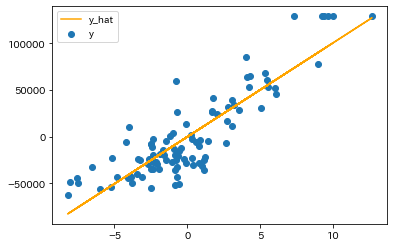

In [212]:
plt.scatter(x,y, label='y') # 実測値
plt.plot(x,a*x,label='y_hat',color = 'orange') # 予測値の線
# plt.scatter(x_new,y_hat, label='hat') # 実測値
plt.legend() # 凡例の表示
plt.show()

## 予測値の計算

$$
\begin{align}
y-{\bar y}&= a(x - {\bar x})\\
\rightarrow y &= a(x - {\bar x}) + {\bar y} 
\end{align}
$$

- x, y も中心化されているので、yを元々のスケールに戻してあげる必要がある。
$${\bar y} $$を右側へ移動

In [165]:
x_new = 40 # 新しい部屋の家賃の面積

In [169]:
mean = df.mean()

In [172]:
mean['x']

37.62222

In [176]:
xc = x_new - mean['x']

In [177]:
xc

2.3777800000000013

## 単回帰分析による予測

- 中心化したものを、元のスケールの値に戻してあげる必要がある

In [189]:
# 単回帰分析による予測（yの中央値）
yc = a * xc

In [188]:
yc

23941.920365903272

In [191]:
# 元のスケールの予測値
y_hat = yc + mean['y']

In [15]:
y_hat

NameError: name 'y_hat' is not defined

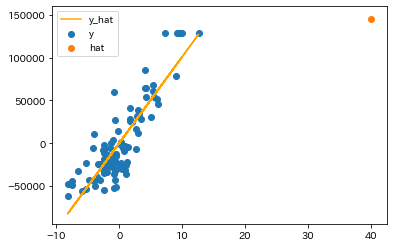

In [213]:
plt.scatter(x,y, label='y') # 実測値
plt.plot(x,a*x,label='y_hat',color = 'orange') # 予測値の線
plt.scatter(x_new,y_hat, label='hat') # 予測値
plt.legend() # 凡例の表示
plt.show()

# 予測できる関数を作る。

- 30m^2 以下がうまく行かない理由
- 元々持っているデータが30m^2から50m^2となり、外挿の範囲となり、うまく予想できない。
- 内挿の範囲ならば、うまく予想できる。

- 25m^2を学習範囲に入れてあげると、マイナスの値を出すことなく、うまく予測ができる。

- 次のコースでは、重回帰分析を用いる。

In [29]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.0
    # 中心化
    xc = x - xm
    # 予測値の計算
    y_hat = a * xc + ym
    # 出力
    return y_hat

In [33]:
predict(40)

145006.92036590326

In [215]:
mean['y']

121065.0

In [216]:
mean['x']

37.62222

In [1]:
def Forcast(x_P):
    # importファイル
    import pandas as pd
    import matplotlib.pyplot as plt
    # ファイルの読み込み
    df = pd.read_csv('sample.csv')
    df_c = df - df.mean()
    x_r = df['x']
    y_r = df['y']
    x = df_c['x']
    y = df_c['y']
    xx = x * x # * は要素積
    xy = x * y
    a = xy.sum() / xx.sum()
    mean = df.mean()
    xc = x_P - mean['x']
    yc = a * xc
    y_hat = yc + mean['y']
    # グラフの描画
    plt.scatter(x_r,y_r, label='real') #現実の値
    plt.plot(x+mean['x'],a*x + mean['y'],label='y_real',color = 'gray') # 予測値の線
    plt.scatter(x,y, label='y') # 実測値
    plt.plot(x,a*x,label='y_hat',color = 'green') # 予測値の線
    plt.scatter(x_P,y_hat, label='hat',color = 'red') # 実測値
    plt.legend() # 凡例の表示
    plt.show()
    print("y_hat:",y_hat)
    print("xc:",xc)
%matplotlib inline

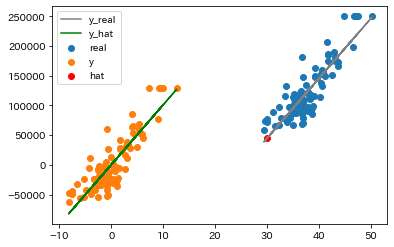

y_hat: 44316.695173062646
xc: -7.622219999999999


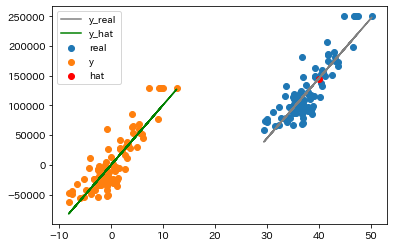

y_hat: 145006.92036590326
xc: 2.3777800000000013


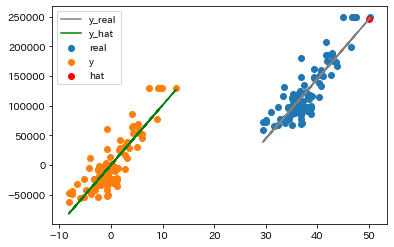

y_hat: 245697.1455587439
xc: 12.377780000000001


In [2]:
Forcast(30)
Forcast(40)
Forcast(50)

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install chainer

  Created wheel for chainer: filename=chainer-7.7.0-py3-none-any.whl size=967516 sha256=22ae27adee79fa35321996da9efc52667b23293d8ed8e6329053ef3b837eb4a3
  Stored in directory: c:\users\fujiokk\appdata\local\pip\cache\wheels\4f\c2\ca\e46a1181cc92ebe6e2d117a5cd29da5bcfc8464e00edb2cac0
Successfully built chainer
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.
